# DSCI100 Project Individual Planning Proposal
By Gordon Zheng

In [177]:
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

## Data description

#### 1. General Overview

In my proposal, I will use both files given:
* `players.csv` (196 observations, 7 variables): contains player demographic  data.
* `project.csv` (1,535 observations, 5 variables): contains session-based data.

**Players Dataset (players.csv):**

| Variable | Type | Description |
|--------|----|-----------|
| `experience` | character | Player's skill level |
| `subscribe` | logical | Indicates whether player subscribed to a game-related newsletter |
| `hashedEmail` |character | Unique identifier for each player (hashed) |
| `played_hours` | numeric | The total hours the player has played |
| `name` | character | Player's name |
| `gender` | character | Gender |
| `Age` | numeric | Player's age |

**Sessions Dataset (sessions.csv):**

| Variable | Type | Description |
| ---- | ---- | ---- |
| `hashedEmail` |character | Unique identifier for each player (hashed) |
| `start_time` | character | Session start time in DD/MM/YYYY HH/MM format |
| `end_time` | character | Session end time in DD/MM/YYYY HH/MM format |
| `original_start_time` | numeric | UNIX timestamp of session start time |
| `original_end_time` | numeric | UNIX timestamp of session end time |

**Summary Statistics** 
|  | `played_hours` | `Age` | `original_start_time` | `original_end_time` |
| ---- | ---- | ---- | ---- | ---- |
| count | 196 | 194 | 1535 | 1533 |
| mean | 5.845918 | 20.52062 | 1.719201e+12 | 1.719196e+12 |
| min | 0 | 8 | 1.7124e+12 | 1.7124e+12 |
| max | 223.1 | 50 | 1.72733e+12 | 1.72734e+12 |


#### 2. Potential Issues

1) **Data Collection Issues:**
* There might be some subjective inconsistencies with `experience` if it was self-reported.
* `Age`, `end_time` and, `original_end_time` have 2 missing values.
  
2) **Data Formatting Issues:**
* `experience` and `gender` should be factor variables.
* `start_time` and `end_time` should be converted into proper datetime data types.
  
3) **Data Imbalances:**
* With 196 players and 1535 unique sessions, there is an imbalance with some players having 0 sessions and others having more.
* Distribution imbalances in variables like `subscribed`, `gender`, and `Age`.

# Questions
**1. Broad Question:**
"What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"

**2. Specific Question:**
"Can a player's played hours and session count predict subscription status in the players dataset? How does a player’s experience strengthen or weaken the predictive ability of played hours and session_count for subscription status?"

**Response Variable:** `subscribe`
* Inidcates whether a player is subscribed to a game-related newsletter or not and is what we aim to predict.

**Explanatory Variables:** `played_hours`, `experience`
* `played_hours` and session count: In-game engagement time and frequency likely impacts the likelihood of players seeking out more game-information on newsletters.
* `experience`: A player's experience with the game might dictate whether or not they seek out game-related newsletters.
* session count: A player's number of sessions computed from the sessions.csv file.
  
**Preparatory wrangling:**
* Computing session count from sessions.csv.
* Joining session count to the players.csv using the `hashedEmail`.
* Imputing missing data with mean values or 0 (For players with no sessions).
* Converting `experience` into a numerical variable (1 - Beginner, 2 - Regular, etc) 

## Exploratory Data Analysis and Visualization

In [178]:
players_data <- read_csv("https://raw.githubusercontent.com/kathleenramsey/dsci100_group23/refs/heads/main/Project%20Planning%20Players.csv")
players_data 

sessions_data <- read_csv("https://raw.githubusercontent.com/kathleenramsey/dsci100_group23/refs/heads/main/Project%20Planning%20Stage%20Sessions.csv")
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


#### 2. Tidying and appropriate wrangling

In [179]:
# converting experience and gender into factor variables
players_tidy <- players_data |>
    mutate(experience = as_factor(experience),
           gender = as_factor(gender))

# converting start_time and end_time into correct datetime format
sessions_tidy <- sessions_data |>
    mutate(start_time = dmy_hm(start_time),
           end_time = dmy_hm(end_time))

#### 3. Mean values from players.csv

In [180]:
players_mean_data <- players_tidy |>
    summarize(mean_played_hours = mean(played_hours, na.rm = TRUE),
              mean_age = mean(Age, na.rm = TRUE))
players_mean_data

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


#### 4. Exploratory visualizations
Since my question calls for session count, something that isn't directly available in the datasets, I'll first compute session count from the sessions data and then add it to the players data. 

In [181]:
# getting session_count
session_count <- sessions_tidy |>
    group_by(hashedEmail) |>
    summarize(session_count = n())

# joining to players_data, replacing NA for 0 since these players have no sessions registered
players_sc <- players_tidy |>
    left_join(session_count) |>
    mutate(session_count = replace_na(session_count, 0))
players_sc

Joining with `by = join_by(hashedEmail)`


experience,subscribe,hashedEmail,played_hours,name,gender,Age,session_count
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,1
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,6
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA,1


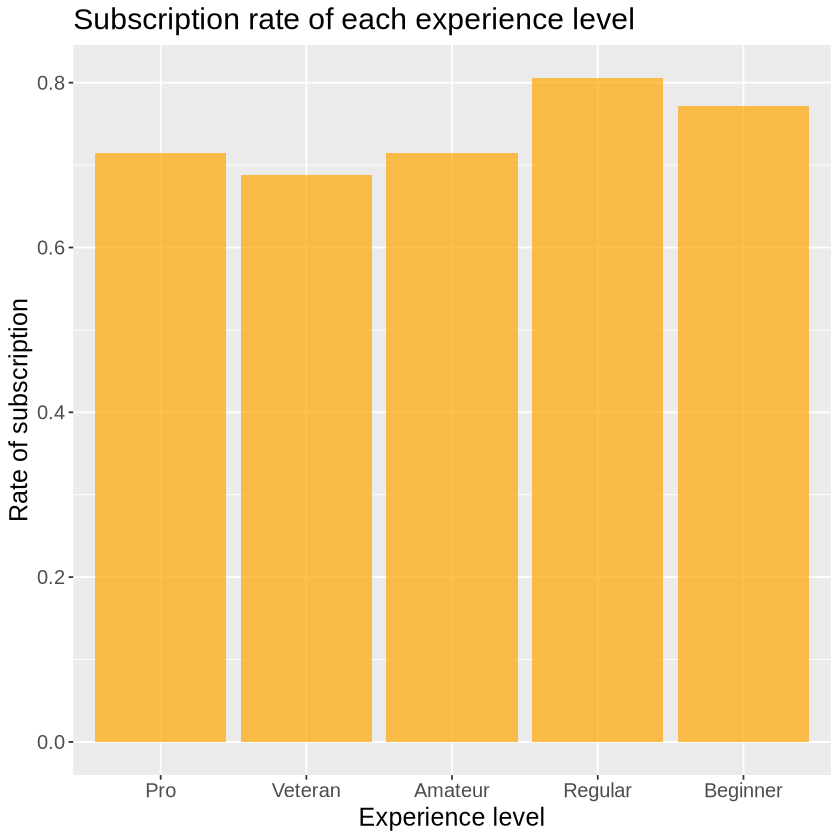

In [182]:
# Subscription rate of different experience levels
experience_bar <- players_sc |>
    group_by(experience) |>
    summarize(subscribe_rate = mean(as.numeric(subscribe), na.rm = TRUE)) |>
    ggplot(aes(x = experience, y = subscribe_rate)) +
        geom_bar(stat = "identity", fill = "orange", alpha = 0.7) +
        labs(title = "Subscription rate of each experience level",
             x = "Experience level",
             y = "Rate of subscription") +
        theme(text = element_text(size = 15))
experience_bar

**Insights:**
Regular players have the highest subscription rates, followed up by beginner, amateur, pro and veteran. This might inidcate that less experienced players are more keen to learn about game-related information. 

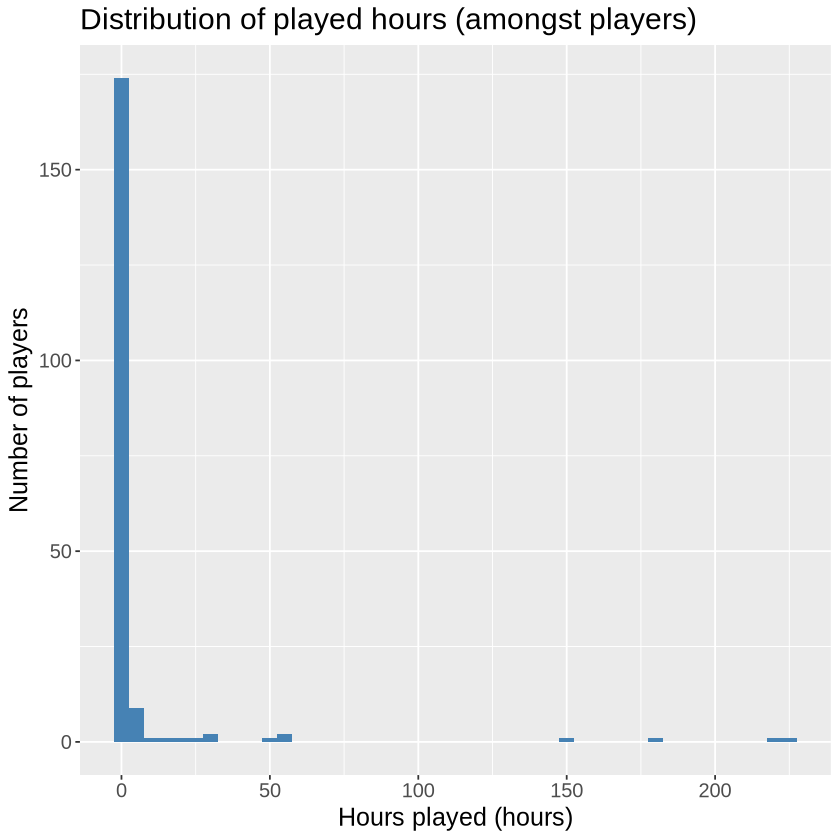

In [183]:
# Histogram for distribution of played hours amongst players
played_hours_hist <- players_sc |>
    ggplot(aes(x = played_hours)) +
        geom_histogram(binwidth = 5, fill = "steelblue") +
        labs(title = "Distribution of played hours (amongst players)",
             x = "Hours played (hours)",
             y = "Number of players") +
        theme(text = element_text(size = 15)) 
played_hours_hist

**Insights:** 
Data on hours played is heavily skewed. A huge majority of players have single digit hours played. There are few outliers who have very high hours played. 

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


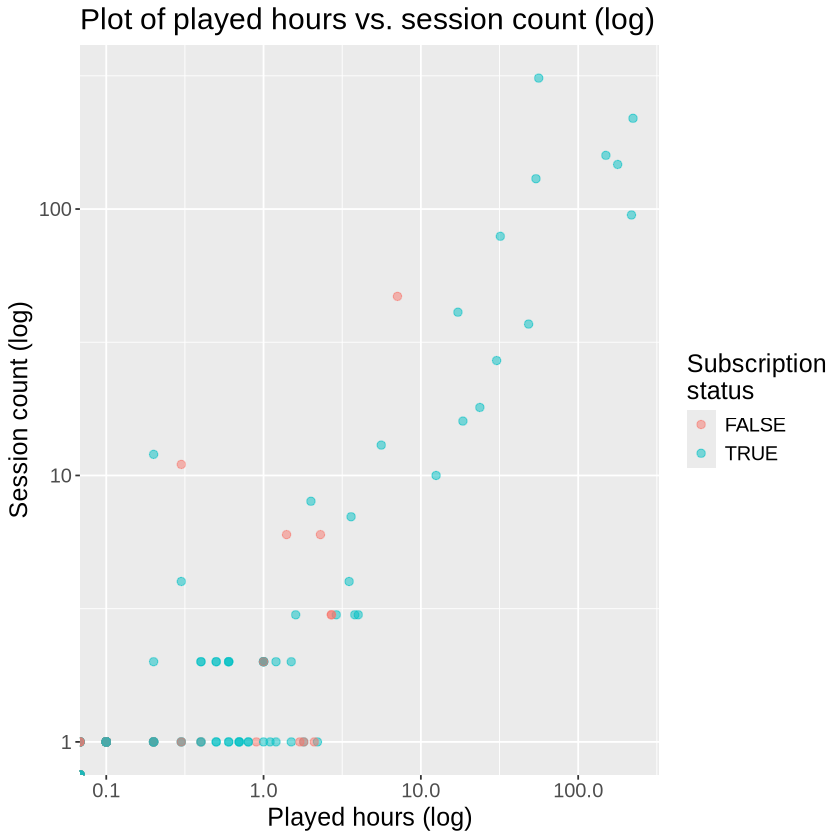

In [184]:
# Plot of played hours vs session count
played_hours_vs_age <- players_sc |>
    ggplot(aes(x = played_hours, y = session_count, color = subscribe)) +
        geom_point(alpha = 0.5, size = 2) +
        labs(title = "Plot of played hours vs. session count (log)",
             color = "Subscription\nstatus",
             x = "Played hours (log)",
             y = "Session count (log)") +
        theme(text = element_text(size = 15)) +
        scale_x_log10() +
        scale_y_log10() 
played_hours_vs_age

**Insights:** 
There is a moderately strong, linear, positive relationship between `session_count` and `played_hours`. This suggests that those with more hours usually accumulate the hours via multiple sessions rather than few longer ones. The upper right is dominated by subscribed players. Due to the inbalance in `played_hours`, logarithmic scaling was used.

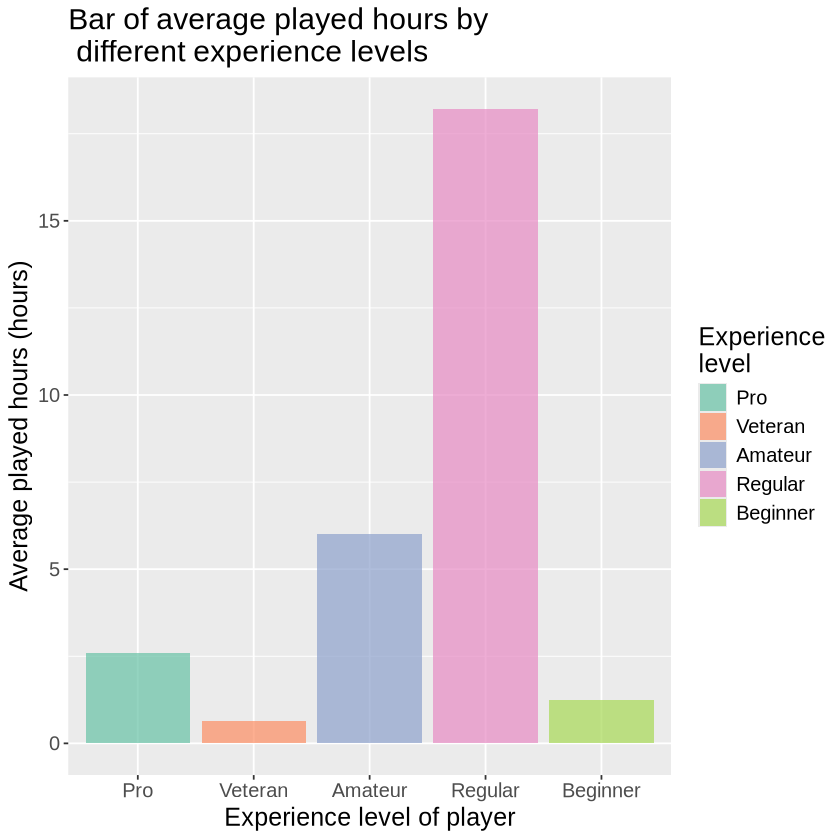

In [185]:
# bar graph on the avg played hours per experience level
avg_played_hours_by_exp <- players_sc |>
    group_by(experience) |>
    summarise(avg_played_hours = mean(played_hours, na.rm = TRUE)) |>
    ggplot(aes(x = experience, y = avg_played_hours, fill = experience)) +
        geom_bar(stat = "identity", alpha = 0.7) +
        labs(title = "Bar of average played hours by\n different experience levels",
             fill = "Experience\nlevel",
             x = "Experience level of player",
             y = "Average played hours (hours)") +
        theme(text = element_text(size = 15)) + 
        scale_fill_brewer(palette = "Set2")
avg_played_hours_by_exp

**Insights:** 
Regular players are consistently playing the most hours by far. Veterans play the least despite their level. This might suggest that an influx of new players started playing after the data collection begun. Alternatively, the assignment of the experience levels might not be as objective as I hoped which does put some doubts as to how it'll benefit our model later. 

## Methods and Plan

#### Method to be Used
I will use k-nearest neighbors classification to assess the predicitve ability of `played_hours` and session count towards the `subscribe` variable.

**1. Why is this method appropriate:**
* Since our response variable, `subscribe`, is more of a categorical variable than a quantitative one, classification is the more appropriate choice for predictive modeling.
* Knn does not assume a specific distribution of the data, making it flexible for our data sets.

**2. Which assumptions are required, if any, to apply the method selected:**
* Our predictor variables should at least be relavant and impactful enough to `subscribe` so that our classifier works.
* A good enough amount of each class in `subscribe` to be able to train the data well.
   
**3. What are the potential limitations or weaknesses of the method selected:**
* Slower computation.
* While our vairables do sound relevant enough to be included, whether they all predict subscription status is still unknown and will only worsen the predictive ability of knn classification if they aren't.
  
**4. How are you going to compare and select the model:**
* Make 2 models, one using `played_hours` and session count as predictors and the other using `experience`, `played_hours` and session count.
* Using cross-validation and tuning on our training split to get the best performing k-value for our models.
* Depending on our goal, we'll have to choose our k-value based on either precision, recall, or accuracy as a whole.
* Evaluate and compare how well the two models do and pick the one that suits our needs best.
  
**5. How are you going to process the data to apply the model:**
* Compute session count and join with players_data by `hashedEmail`.
* Convert `experience` into a numeric variable with {1, 2, 3, 4, 5} representing each experience level.
* Split data into a 70% training and 30% testing split.
* Standardize predictor variables.
* Use a 10-fold cross-validation to find the most optimal k-value.